In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
def scatter_plot_data(X,y, class_names, feature_names,marker='o',colors=[]):
    classes = np.unique(y)
    for i,class_ in enumerate(classes):
        X_class = X[np.where(y==class_)[0],:]
        if len(colors)==0:
            plt.scatter(X_class[:,0], X_class[:,1], marker=marker)
        else:
            plt.scatter(X_class[:,0], X_class[:,1], marker=marker,color = colors[i])
    plt.legend(class_names, loc=4)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])


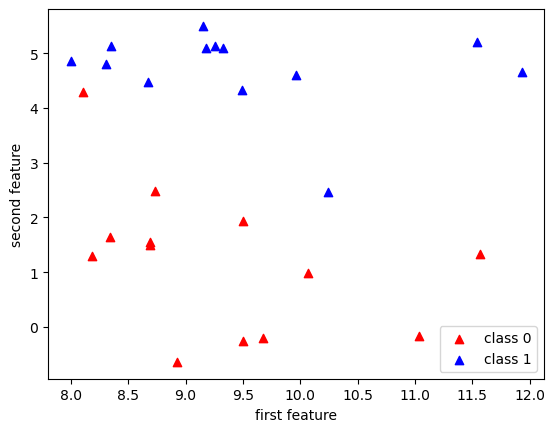

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
scatter_plot_data(X,y,['class 0','class 1'],['first feature', 'second feature'],'^',colors=['red', 'blue'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
print(f"Train data shape = {X_train.shape}")
print(f"Test data shape = {X_test.shape}")

Train data shape = (20, 2)
Test data shape = (6, 2)


In [77]:
seed = 42
np.random.seed(seed)
def relu(x):
    return np.maximum(0,x)

def sigmoid(x):
    sigmoid = 1/(1+np.exp(-x))
    return sigmoid

def softmax(z):
    exp_z = np.exp(z)
    softmax = exp_z/(np.sum(exp_z,axis=1,keepdims=True))
    return softmax

def relu_derivative(z):
    derivative = z.copy()
    derivative[derivative<0]=0
    return derivative
    

class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, alpha=0.1,debug = False):
        self.alpha = alpha
        self.w = None
        self.debug = debug
        self.w1 = np.random.rand(hidden_dim, input_dim+1)
        self.w2 = np.random.rand(output_dim, hidden_dim+1)
    def forward(self, X, y):
        m, num_features = X.shape
        #forward prop through layer 1
        #append 0 to X for bias
        X_new = np.hstack((X,np.ones(shape = (m,1))))
        Z1 = X_new@self.w1.T
        A1 = relu(Z1)
        #stack ones for bias
        A1_biased = np.hstack((A1,np.ones(shape=(m,1))))
        if self.debug:
            print(f"A1 = \n{A1_biased}")
        #forward prop through layer 2
        Z2 = A1_biased@self.w2.T
        y_hat = softmax(Z2)
        if self.debug:
            print(f"y_hat = \n{y_hat}")
        return A1_biased, y_hat
        
    def loss(self,y_pred, y):
        m = y.shape[0]
        Loss = -np.sum(y*np.log(y)+(1-y)*np.log(1-y))/m
    
    def compute_gradients():
        A1_biased, y_hat = self.forward(X,y)
        dL_dz2 =  (y_hat-y) #m*od
        dz2_dw2 = A1_biased #m*h_d+1
        dL_dw2 = (y_hat-y).T@dz2_dw2 #odxhd+1
        
        #other backprop
        dz2_da1 = W2[:,:-1] #od*(hd)
        dL_da1 = dL_dz2*dz2_da1 #m*hd
        
        da1_dz1 = relu_derivative(Z1) #m*hd
        dL_dz1 = dL_da1*da1_dz1
        dz1_dw1 = X #m*id+1
        dL_dw1 = dL_dz1.T@dz1_dw1
        
        
        
        
        
        

In [78]:
nn = NeuralNetwork(input_dim = 2,hidden_dim=3,output_dim=2, debug=True)
nn.forward(X_train,y_train)

A1 = 
[[ 9.07095293  6.53272358  5.5587456   1.        ]
 [ 4.03903168  5.80230707  0.92400467  1.        ]
 [ 9.01115786  6.44474978  5.54546582  1.        ]
 [ 5.41491585  5.40720922  2.50481206  1.        ]
 [ 8.41374142  5.88064283  5.2468335   1.        ]
 [ 6.13347776  6.14666646  2.83187035  1.        ]
 [ 6.37194141  5.77324365  3.26658595  1.        ]
 [ 8.40557219  6.51391412  4.90489002  1.        ]
 [ 9.61990987  8.02343081  5.3206295   1.        ]
 [ 3.46535872  5.39756092  0.5650601   1.        ]
 [ 8.34096909  5.70123784  5.26880078  1.        ]
 [ 8.73980927  5.95468138  5.53308665  1.        ]
 [ 8.83392235  6.8378891   5.16143766  1.        ]
 [10.00909563  7.87848441  5.7852736   1.        ]
 [ 4.16202819  5.91508081  0.98726096  1.        ]
 [ 6.90181893  6.66952574  3.32275504  1.        ]
 [ 5.44329187  6.33543686  2.04385538  1.        ]
 [ 8.23625083  6.04762271  4.98175835  1.        ]
 [ 9.07896264  6.4985614   5.58474263  1.        ]
 [ 5.45499148  5.60083799

In [25]:
x = np.array([-1,2,3])
np.maximum(0,x)

array([0, 2, 3])